In [1]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [5]:
from selenium import webdriver

driver = webdriver.Chrome('./webdriver/chromedriver')

url = "http://www.compuzone.co.kr/search/search.htm?Seargbl=1&hidden_Txt=&IsEventSearch=&SearchProductKey=cpu#searchArea"
driver.get(url)

    웹페이지 상품정보 가져오기 
    

In [6]:
from bs4 import BeautifulSoup 

html = driver.page_source 
soup = BeautifulSoup(html, 'html.parser')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=88.0.4324.104)


In [4]:
cpu_items = soup.select('.product_list >li')
#len(cpu_items)

In [5]:
cpu_title = soup.select('.prd_info_Box .prd_info_name')
for title in cpu_title:
    print(title.text)

In [6]:
cpu_spec = soup.select('.prd_subTxt a')
for spec in cpu_spec:
    print(spec.text.strip())

In [7]:
cpu_price = soup.select('span.won > strong')
for price in cpu_price:
    print(price.text.strip())

In [8]:
cpu_data = [] 
for cpu_item in cpu_items:
    try: 
        title = cpu_item.select('.prd_info_Box .prd_info_name')[0].text.strip()
    except:
        title = '상품이름없음'
    try:
        price = cpu_item.select('span.won > strong')[0].text.strip()
    except:
        price = '가격정보없음'
    try:
        spec = cpu_item.select('.prd_subTxt a')[0].text.strip()
    except:
        spec = '상세정보없음'
    cpu_data.append([title, price, spec])
    
print(cpu_data)

[]


In [9]:
def get_cpu_list(cpu_items):
    cpu_list=[]
    for cpu_item in cpu_items:
        try:
            title = cpu_item.select('.prd_info_Box .prd_info_name')[0].text.strip()
        except:
            title = ""
        try:
            spec = cpu_item.select('.prd_subTxt a')[0].text.strip()
        except:
            spec = ""
        try:
            price = cpu_item.select('.number')[0].text.strip()
        except:
            price =0
        cpu_list.append([title, spec, price])
    print(len(cpu_list))
    print(cpu_list)
    return cpu_list


In [10]:
idx=1
cpu_list = [] 
while True: 
    script = "javascript:search_ajax_list('small','cpu','sale_order',20,{},{},0,'4','1012','','undefined',690,19900000,'1327|/|쿨러/튜닝용품|1020|491|/|CPU|1012|228|/|케이스|1147|596|/|커스텀 수랭|1289|6|/|메인보드|1013|6','','','','','','','','','');go_top();"
    driver.execute_script(script.format((idx-1)*20,idx))
    if idx==10:
        break
    idx+=1
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    cpu_items = soup.select('.product_list >li')
    
    cpu_title = soup.select('.prd_info_Box .prd_info_name')
    cpu_spec = soup.select('.prd_subTxt a')
    cpu_price = soup.select('span.won > strong')
    
    for cpu_item in cpu_items:
        try: 
            title = cpu_item.select('.prd_info_Box .prd_info_name')[0].text.strip()
        except:
            title = '상품이름없음'
        try:
            price = cpu_item.select('span.won > strong')[0].text.strip()
        except:
            price = '가격정보없음'
        try:
            spec = cpu_item.select('.prd_subTxt a')[0].text.strip()
        except:
            spec = '상세정보없음'
        cpu_list.append([title, price, spec])
        print(title, price, spec)

[INTEL] 인텔 코어6세대 i3-6100 벌크 쿨러미포함 (스카이레이크/3.7GHz/3MB/병행수입) 100,750 Core i3-6100(3.7GHz) / 듀얼코어 / 스카이레이크(Skylake) / 14nm / 3MB버퍼 / 32(64)비트지원 / LGA1151 / 벌크 / 쿨러미포함
[INTEL] 인텔 코어6세대 i7-6700 벌크 쿨러미포함 (스카이레이크/3.4GHz/8MB/병행수입) 326,560 Core i7-6700(3.4GHz) / 쿼드코어 / 스카이레이크(Skylake) / 14nm / 8MB버퍼 / 32(64)비트지원 / LGA1151 / 벌크 / 쿨러미포함
[INTEL] 인텔 코어8세대 i3-8100 벌크 쿨러미포함 (커피레이크/3.6GHz/6MB/병행수입) 134,000 Core i3-8100(3.6GHz) / 쿼드코어 / 커피레이크(CoffeeLake) / 14nm / 6MB버퍼 / LGA1151-V2 / 병행수입 벌크 / 쿨러미포함 / 쿼드(4)코어
[INTEL] 인텔 코어8세대 i7-8700 벌크 쿨러미포함 (커피레이크/3.2GHz/12MB/병행수입) 332,590 Core i7-8700(3.2GHz) / 헥사코어 / 커피레이크(CoffeeLake) / 14nm / 12MB버퍼 / LGA1151-V2 / 병행수입 벌크 / 쿨러미포함
[INTEL] 인텔 코어8세대 i3-8100 벌크 쿨러포함 (커피레이크/3.6GHz/6MB/병행수입) 135,950 Core i3-8100(3.6GHz) / 쿼드코어 / 커피레이크(CoffeeLake) / 14nm / 6MB버퍼 / LGA1151-V2 / 병행수입 벌크 / 쿨러포함
[INTEL] 인텔 코어7세대 i3-7100 벌크 쿨러미포함 (카비레이크/3.9GHz/3MB/병행수입) 100,450 Core i3-7100(3.9GHz) / 듀얼코어 / 카비레이크(KabyLake) / 14nm / 3MB버퍼 / LGA1151 / 벌크 / 쿨러미포함
[INTEL] 코어10세대 i9-10920X 정품박스 (캐

[AMD] 라이젠 7 마티스 3800XT (옥타코어/3.9GHz/쿨러미포함/대리점정품) 399,000 AMD(소켓AM4) / 3세대 (Zen 2) / 7nm / 옥타(8)코어 / 16쓰레드 / 기본 클럭: 3.9GHz / 최대 클럭: 4.7GHz / GAME캐시: 36MB / TDP: 105W / PCIe4.0 / 메모리 규격: DDR4 / 3200MHz / 내장그래픽: 미탑재 / 기술 지원: SenseMI , StoreMI / 쿨러미포함
[INTEL] 코어10세대 i5-10400F 벌크 쿨러미포함 (코멧레이크/2.90GHz/12MB/병행수입) 158,000 인텔(소켓1200) / 14nm / 6코어 / 쓰레드 12개 / 기본 클럭: 2.9GHz / 12MB / 64비트 / 설계전력: 65W / 메모리 규격: DDR4 / 메모리 버스: 2666MHz / 내장그래픽 미포함 / LGA 1200
[INTEL] 셀러론 G4930 정품박스 (커피레이크 리프레시/3.2GHz/2.0MB/쿨러포함) 46,900 인텔(소켓1151v2) / 14nm / 듀얼(2)코어 / 2쓰레드 / 기본 클럭: 3.20GHz / L3 캐시: 2MB / 설계전력: 54W / 메모리 규격: DDR4 / 메모리 버스: 2400MHz / 인텔 UHD 610 / 기술 지원: 옵테인 / 쿨러: 인텔 기본쿨러 포함
[AMD] 라이젠 7 버미어 5800X (8코어/16스레드/3.8GHz/쿨러미포함/대리점정품/멀티팩) 566,000 AMD(소켓AM4) / 4세대 (Zen 3) / 7nm / 옥타(8)코어 / 16쓰레드 / 기본 클럭: 3.8GHz / 최대 클럭: 4.7GHz / L3 캐시: 32MB / TDP: 105W / PCIe4.0 / 메모리 규격: DDR4 / 3200MHz / 내장그래픽: 미탑재 / 기술 지원: StoreMI, Ryzen Master, VR Ready 프리미엄 / 쿨러: 미포함
[AMD] 라이젠 7 마티스 3700X (옥타코어/3.6GHz/쿨러포함/대리점정품/멀티팩) 375,000 A

[AMD] 라이젠 스레드리퍼 3970X 정품박스 (32코어/3.7GHz/쿨러미포함/대리점정품/Threadripper) 2,612,270 AMD(소켓sTRX4) / 3세대 (Zen 2) / 7nm / 32코어 / 64쓰레드 / 기본 클럭: 3.7GHz / L3 캐시: 128MB / 설계전력: 280W / PCIe4.0 / 메모리 규격: DDR4 / 메모리 버스: 3200MHz / 기술 지원: XFR, SENSEMI / 쿨러: 미포함 / 쿼드 채널 ECC 메모리 지원
[INTEL] 코어9세대 i3-9100F 병행수입 박스 (커피레이크 리프레시/3.60GHz/6MB/쿨러포함) 100,700 9세대 커피레이크 R / 코어 i3 / 쿼드(4)코어 / LGA1151-V2 / 3.6~4.0GHz / 박스(쿨러포함) / 6MB / 14nm / 내장그래픽미포함
[INTEL] 인텔 코어7세대 i3-7100 벌크 쿨러포함 (카비레이크/3.9GHz/3MB/병행수입) 105,300 Core i3-7100(3.9GHz) / 듀얼코어 / 카비레이크(KabyLake) / 14nm / 3MB버퍼 / LGA1151 / 벌크 / 쿨러포함
[INTEL] 코어10세대 i9-10980XE 정품박스 (캐스케이드레이크/3.0GHz/24.75MB/쿨러미포함) 1,291,500 인텔(소켓2066) / 14nm / 18코어 / 쓰레드 36개 / 3.0GHz / 24.75MB / 165W / DDR4 / 2933MHz / PCIe 3.0 / 하이퍼스레딩 / 옵테인
[INTEL] 코어10세대 i9-10900KF 정품박스 (코멧레이크 /3.70GHz/20MB/쿨러 미포함) 620,000 인텔(소켓1200) / 14nm / 10코어 / 쓰레드 20개 / 기본 클럭: 3.7GHz / 20MB / 64비트 / 설계전력: 125W / 메모리 규격: DDR4 / 메모리 버스: 2933MHz / PCIe 3.0 / 기술 지원: 하이퍼스레딩 , 옵테인 / LGA 1200
[INTEL] 코어10세대 i7-10700K 벌크 쿨러

In [10]:
import pandas as pd
cpu_data = pd.DataFrame(cpu_list)
cpu_data.columns = ['상품명', '가격', '스펙']
cpu_data.to_csv('./cpudata.csv')
cpu_data.to_excel('./cpudata.xlsx')
cpu_data

NameError: name 'cpu_list' is not defined

데이터 전처리 


In [3]:
cpu_xlsx = pd.read_excel('./cpu_data.xlsx')
cpu_xlsx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  180 non-null    int64 
 1   상품명         180 non-null    object
 2   가격          180 non-null    object
 3   스펙          180 non-null    object
 4   회사          180 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.2+ KB


In [85]:
cpu_data = cpu_data[cpu_data['가격'] != 0]
cpu_data

,제목,스펙,가격
0,[INTEL] 인텔 코어6세대 i3-6100 벌크 쿨러미포함 (스카이레이크/3.7G...,"100,750",Core i3-6100(3.7GHz) / 듀얼코어 / 스카이레이크(Skylake) ...
1,[INTEL] 인텔 코어6세대 i7-6700 벌크 쿨러미포함 (스카이레이크/3.4G...,"326,560",Core i7-6700(3.4GHz) / 쿼드코어 / 스카이레이크(Skylake) ...
2,[INTEL] 인텔 코어8세대 i3-8100 벌크 쿨러미포함 (커피레이크/3.6GH...,"134,000",Core i3-8100(3.6GHz) / 쿼드코어 / 커피레이크(CoffeeLake...
3,[INTEL] 인텔 코어8세대 i7-8700 벌크 쿨러미포함 (커피레이크/3.2GH...,"332,590",Core i7-8700(3.2GHz) / 헥사코어 / 커피레이크(CoffeeLake...
4,[INTEL] 인텔 코어8세대 i3-8100 벌크 쿨러포함 (커피레이크/3.6GHz...,"135,950",Core i3-8100(3.6GHz) / 쿼드코어 / 커피레이크(CoffeeLake...
...,...,...,...
175,[INTEL] 인텔 코어7세대 i5-7500 벌크 쿨러미포함 (카비레이크/3.4GH...,가격정보없음,Core i5-7500(3.4GHz) / 쿼드코어 / 카비레이크(KabyLake) ...
176,[INTEL] 제온 E3-1270V5 정품박스 (스카이레이크/3.6GHz/8MB/쿨...,가격정보없음,E3-1270V5(3.6GHz) / 쿼드코어 / 스카이레이크(Skylake) / 1...
177,[INTEL] 코어8세대 i3-8100 정품박스 (커피레이크/3.6GHz/6MB/쿨...,가격정보없음,Core i3-8100(3.6GHz) / 쿼드코어 / 커피레이크(CoffeeLake...
178,[INTEL] 인텔 코어9세대 i3-9100 벌크 쿨러포함 (커피레이크 리프레시/3...,가격정보없음,인텔(소켓1151v2) / 14nm / 쿼드(4)코어 / 4쓰레드 / 기본 클럭: ...


In [11]:
# 제조사 명 추출 & 컬럼추가
company = []
for i in range(len(cpu_data['상'])):
      company.append(cpu_data['상품명'].str.split(']').iloc[i][0][1:])
cpu_data['회사'] = company
cpu_data.to_excel('./cpu_data.xlsx',index=False)
# 스펙에서 회사명, nm 뽑아내기
for i in range(len(cpu_data)):
    for nm in cpu_data['스펙'].str.split('/').iloc[i]:
        if 'nm' in nm:
            print(cpu_data['회사'].iloc[i],nm)

NameError: name 'cpu_data' is not defined

In [54]:
import re
cpu_name = []
cpu_xlsx = pd.read_excel('./cpu_data.xlsx')
number = re.compile(r'\d\d\d\d')
i_product = re.compile(r'i\d')
for i in range(len(cpu_xlsx)):
    for title in cpu_xlsx['상품명'].str.split(' ').iloc[i]:
        if i_product.search(title):
            cpu_name.append(title)
        elif number.search(title):
            cpu_name.append(title)

cpu_name = set(cpu_name)
len(cpu_name)

127

In [57]:
cpu_bench = pd.read_csv('./cpu_bench.csv')

for cpu in cpu_bench: 
    for name in cpu_name: 
        if name in cpu['이름']: 
            print(name, cpu_bench['종합'], cpu_bench['쓰레드'])

TypeError: string indices must be integers

In [147]:
#3번 그래프 그리기 
cpu_data = pd.read_csv('./cpudata.csv')
temp_data = cpu_data
nano_list = []
company = []
for i in range(len(temp_data['상품명'])):
      company.append(temp_data['상품명'].str.split(']').iloc[i][0][1:])
temp_data['회사'] = company
temp_data.to_excel('./cpu_data.xlsx',index=False)
# 스펙에서 회사명, nm 뽑아내기
for i in range(len(temp_data)):
    for nm in cpu_data['스펙'].str.split('/').iloc[i]:
        if 'nm' in nm:
            nano_list.append([cpu_data['회사'].iloc[i],nm.strip()])
            
nano = pd.DataFrame(nano_list, columns=['회사', 'nm'])
nano

,회사,nm
0,INTEL,14nm
1,INTEL,14nm
2,INTEL,14nm
3,INTEL,14nm
4,INTEL,14nm
...,...,...
173,INTEL,14nm
174,INTEL,14nm
175,INTEL,14nm
176,INTEL,14nm


In [145]:
nano=[]

<AxesSubplot:xlabel='nm', ylabel='count'>

C:\Users\kosmo_17\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosmo_17\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kosmo_17\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\kosmo_17\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)


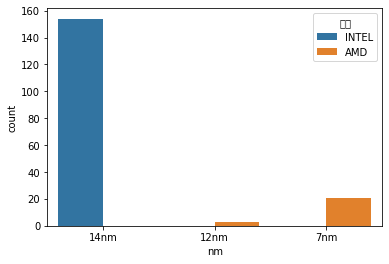

In [295]:
import seaborn as sns                  
import matplotlib.pyplot as plt

sns.countplot(data=nano, hue='회사', x='nm')
